In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [60]:
dados = pd.read_csv('houses_to_rent_v2.csv')

In [61]:
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [62]:
dados.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22,1587


In [63]:
dados.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [64]:
dados['floor'] = dados['floor'].replace('-',0).astype(np.int64)

In [65]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [66]:
dados_bh = dados[dados['city']=='Belo Horizonte'].reset_index(drop = True)

In [67]:
dados_bh

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
1,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
2,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
3,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
4,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Belo Horizonte,65,2,1,1,1,acept,not furnished,200,1100,70,15,1385
1254,Belo Horizonte,80,2,1,1,3,not acept,not furnished,240,1200,67,16,1523
1255,Belo Horizonte,95,3,2,2,7,acept,not furnished,525,3100,219,42,3886
1256,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897


In [68]:
dados.describe().round(2)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,5.07,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,6.07,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,1.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,3.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,8.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,301.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [69]:
dados.query('area == 46335.00')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220


In [70]:
dados_bh.rename(columns={'city': 'cidade', 'rooms': 'quartos', 'bathroom':'banheiros', 'parking spaces':'vagas', 'floor' :'andares','furniture':'mobilia', 'hoa (R$)':'Valor_condominio', 'rent amount (R$)':'Valor_aluguel', 'property tax (R$)':'Valor_impostos','fire insurance (R$)':'Valor_seguro', 'total (R$)':'Valor_total'}, inplace=True)


In [71]:
dados_bh.loc[:, 'animal']  = dados_bh['animal'].replace('not acept', 0).replace('acept',1)

In [72]:
dados_bh.loc[:, 'mobilia'] = dados_bh['mobilia'].replace('not furnished', 0).replace('furnished', 1)

In [73]:
dados_bh

,cidade,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total
0,Belo Horizonte,42,1,1,1,17,0,1,470,2690,172,36,3368
1,Belo Horizonte,64,2,2,1,11,1,0,352,1500,80,20,1952
2,Belo Horizonte,80,3,2,1,0,1,0,0,11000,425,181,11610
3,Belo Horizonte,200,4,2,1,7,0,0,850,2550,9,34,3443
4,Belo Horizonte,45,1,1,1,5,1,0,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Belo Horizonte,65,2,1,1,1,1,0,200,1100,70,15,1385
1254,Belo Horizonte,80,2,1,1,3,0,0,240,1200,67,16,1523
1255,Belo Horizonte,95,3,2,2,7,1,0,525,3100,219,42,3886
1256,Belo Horizonte,55,2,1,1,2,0,1,200,1600,75,22,1897


In [74]:
dados_bh['Preço_do_m2'] = (dados_bh['Valor_total'] / dados_bh['area']).round().astype(np.int64)

In [75]:
dados_bh

,cidade,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2
0,Belo Horizonte,42,1,1,1,17,0,1,470,2690,172,36,3368,80
1,Belo Horizonte,64,2,2,1,11,1,0,352,1500,80,20,1952,30
2,Belo Horizonte,80,3,2,1,0,1,0,0,11000,425,181,11610,145
3,Belo Horizonte,200,4,2,1,7,0,0,850,2550,9,34,3443,17
4,Belo Horizonte,45,1,1,1,5,1,0,500,1631,192,12,2335,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Belo Horizonte,65,2,1,1,1,1,0,200,1100,70,15,1385,21
1254,Belo Horizonte,80,2,1,1,3,0,0,240,1200,67,16,1523,19
1255,Belo Horizonte,95,3,2,2,7,1,0,525,3100,219,42,3886,41
1256,Belo Horizonte,55,2,1,1,2,0,1,200,1600,75,22,1897,34


In [76]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format',lambda x: '%0.2f'% x)
dados_bh.describe()

,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2
count,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00,1258.00
mean,207.41,3.02,2.40,1.96,3.86,0.74,0.14,2324.20,3664.13,272.78,53.68,6315.24,42.00
std,1312.43,1.28,1.43,1.67,9.41,0.44,0.35,44504.53,3493.66,485.79,53.63,44654.83,287.36
min,15.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,6.00,499.00,0.00
25%,67.25,2.00,1.00,1.00,0.00,0.00,0.00,0.00,1250.00,68.25,17.00,1611.25,19.00
50%,110.00,3.00,2.00,2.00,2.00,1.00,0.00,300.00,2300.00,147.00,32.00,3040.00,25.00
75%,220.00,4.00,3.00,3.00,5.00,1.00,0.00,728.00,4600.00,333.25,67.00,5925.75,36.00
max,46335.00,10.00,10.00,8.00,301.00,1.00,1.00,1117000.00,15000.00,12500.00,246.00,1120000.00,7226.00


In [77]:
dados_bh.isna().sum()

cidade              0
area                0
quartos             0
banheiros           0
vagas               0
andares             0
animal              0
mobilia             0
Valor_condominio    0
Valor_aluguel       0
Valor_impostos      0
Valor_seguro        0
Valor_total         0
Preço_do_m2         0
dtype: int64

In [78]:
dados_bh = dados_bh[(dados_bh['Valor_total'] < 1120000) & (dados_bh['area'] < 46335) & (dados_bh['andares'] < 301)]

dados_bh.describe()

,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2
count,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00
mean,170.81,3.02,2.40,1.96,3.62,0.74,0.14,548.75,3662.51,272.90,53.67,4538.12,30.57
std,168.77,1.28,1.42,1.67,4.27,0.44,0.35,757.83,3496.27,486.37,53.68,4185.94,18.22
min,15.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,6.00,499.00,3.00
25%,67.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,1250.00,69.00,17.00,1608.50,19.00
50%,110.00,3.00,2.00,2.00,2.00,1.00,0.00,298.00,2300.00,147.00,32.00,3025.50,25.00
75%,220.00,4.00,3.00,3.00,5.00,1.00,0.00,720.00,4600.00,333.25,67.00,5876.00,36.00
max,2000.00,10.00,10.00,8.00,29.00,1.00,1.00,7630.00,15000.00,12500.00,246.00,27760.00,152.00


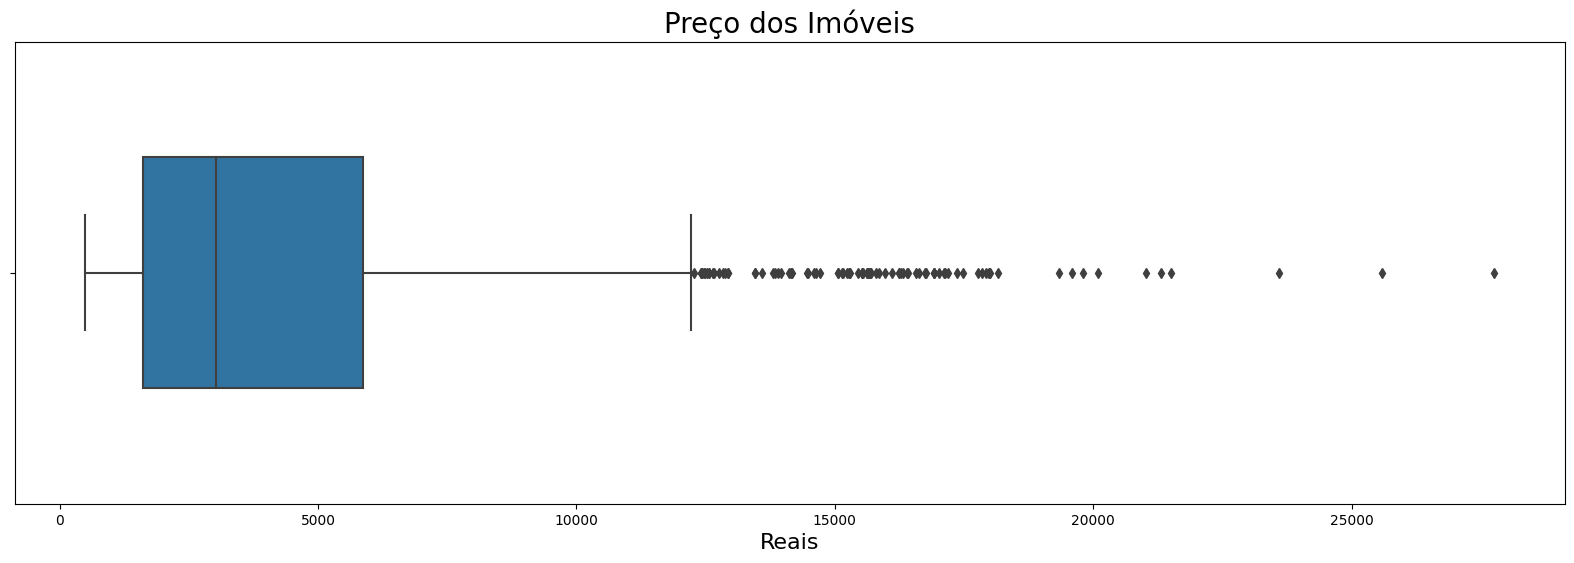

In [79]:
ax = sns.boxplot(data = dados_bh, x = 'Valor_total',width =0.5)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax;

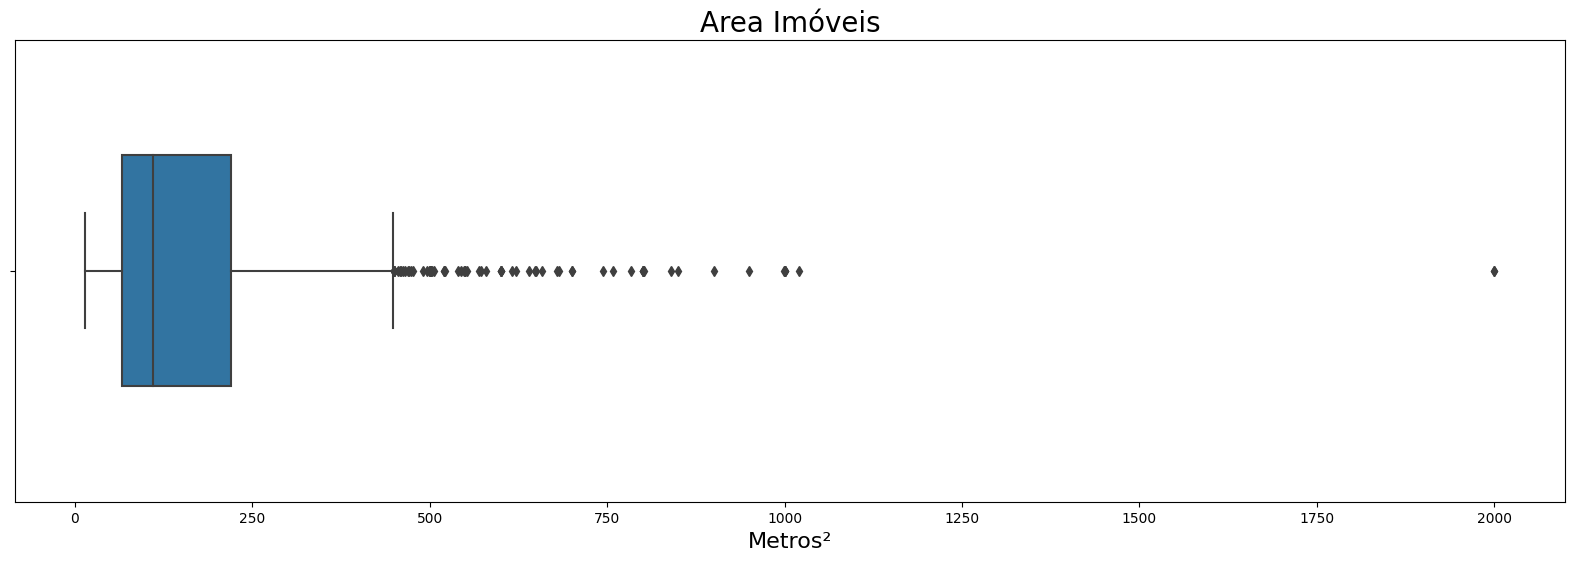

In [80]:
ax = sns.boxplot(data = dados_bh, x = 'area',width =0.5)
ax.figure.set_size_inches(20, 6)
ax.set_title('Area Imóveis', fontsize=20)
ax.set_xlabel('Metros²', fontsize=16)
ax;

<AxesSubplot: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

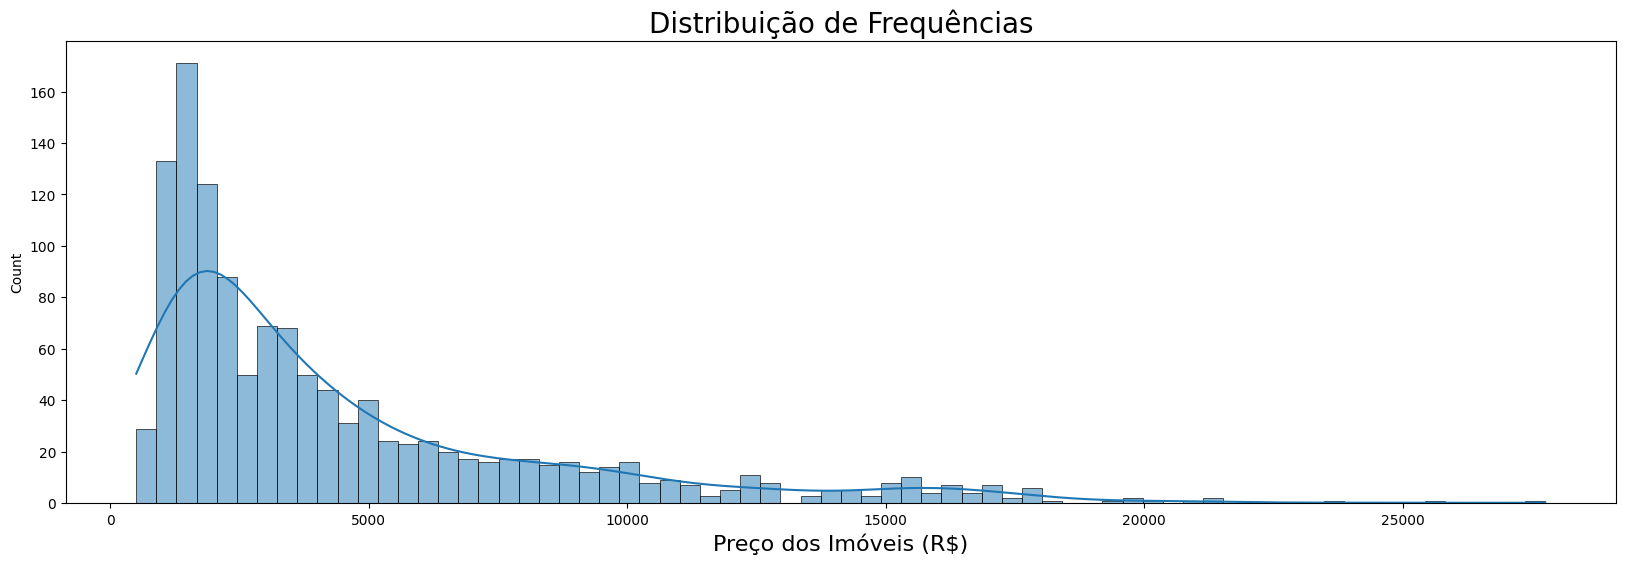

In [81]:
ax = sns.histplot(data =dados_bh, x='Valor_total', kde= True, bins = 70) 
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

In [82]:
dados_bh.describe()

,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2
count,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00,1254.00
mean,170.81,3.02,2.40,1.96,3.62,0.74,0.14,548.75,3662.51,272.90,53.67,4538.12,30.57
std,168.77,1.28,1.42,1.67,4.27,0.44,0.35,757.83,3496.27,486.37,53.68,4185.94,18.22
min,15.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,450.00,0.00,6.00,499.00,3.00
25%,67.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,1250.00,69.00,17.00,1608.50,19.00
50%,110.00,3.00,2.00,2.00,2.00,1.00,0.00,298.00,2300.00,147.00,32.00,3025.50,25.00
75%,220.00,4.00,3.00,3.00,5.00,1.00,0.00,720.00,4600.00,333.25,67.00,5876.00,36.00
max,2000.00,10.00,10.00,8.00,29.00,1.00,1.00,7630.00,15000.00,12500.00,246.00,27760.00,152.00


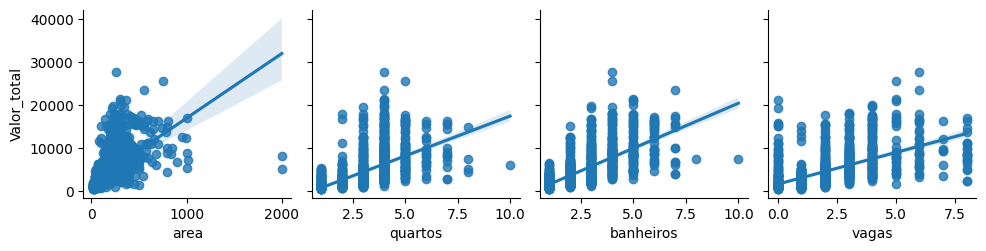

In [83]:
ax = sns.pairplot(data = dados_bh , y_vars ='Valor_total', x_vars = ['area','quartos','banheiros', 'vagas'], kind = 'reg')

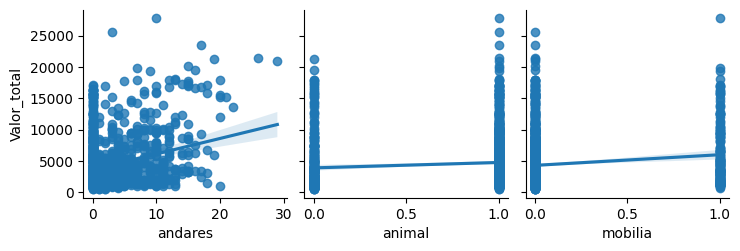

In [84]:
ax = sns.pairplot(data = dados_bh , y_vars ='Valor_total', x_vars = [ 'andares','animal', 'mobilia'], kind = 'reg')

In [85]:
dados_bh[['Valor_total','area','quartos','banheiros', 'vagas', 'andares','animal', 'mobilia']].corr()

,Valor_total,area,quartos,banheiros,vagas,andares,animal,mobilia
Valor_total,1.00,0.61,0.57,0.71,0.59,0.25,0.09,0.14
area,0.61,1.00,0.63,0.67,0.60,-0.09,0.16,0.05
quartos,0.57,0.63,1.00,0.72,0.59,-0.09,0.23,-0.03
banheiros,0.71,0.67,0.72,1.00,0.65,0.09,0.15,0.07
vagas,0.59,0.60,0.59,0.65,1.00,0.02,0.16,0.06
andares,0.25,-0.09,-0.09,0.09,0.02,1.00,-0.08,0.09
animal,0.09,0.16,0.23,0.15,0.16,-0.08,1.00,-0.07
mobilia,0.14,0.05,-0.03,0.07,0.06,0.09,-0.07,1.00


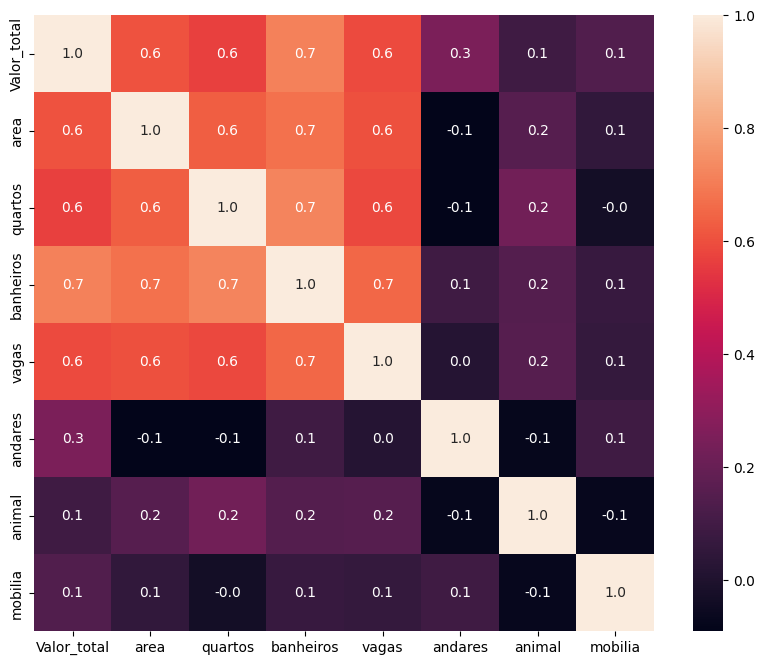

In [86]:
matrix_correlacao =dados_bh[['Valor_total','area','quartos','banheiros', 'vagas', 'andares','animal', 'mobilia']].corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matrix_correlacao, annot = True, fmt = '.1f')

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
y = dados_bh['Valor_total']

In [89]:
X = dados_bh[['area','quartos','banheiros', 'vagas', 'andares','animal', 'mobilia']]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [91]:
import statsmodels.api as sm

In [92]:
X_train_com_constante = sm.add_constant(X_train)

In [93]:
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Valor_total   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     230.0
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          5.65e-203
Time:                        13:26:08   Log-Likelihood:                -9301.0
No. Observations:                1003   AIC:                         1.862e+04
Df Residuals:                     995   BIC:                         1.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1378.1712    260.006     -5.301      0.0

In [94]:
X = dados_bh[['area','quartos','banheiros', 'vagas', 'andares', 'mobilia']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [96]:
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            Valor_total   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     267.2
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.63e-203
Time:                        13:26:08   Log-Likelihood:                -9302.6
No. Observations:                1003   AIC:                         1.862e+04
Df Residuals:                     996   BIC:                         1.865e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1574.1864    236.077     -6.668      0.0

# logaritimizando os dados

In [97]:
dados_bh['log_Valor_total'] = np.log(dados_bh['Valor_total'])
dados_bh['log_Area'] = np.log(dados_bh['area'])
dados_bh['log_Quartos'] = np.log(dados_bh['quartos'])
dados_bh['log_banheiros'] = np.log(dados_bh['banheiros'])
dados_bh['log_vagas'] = np.log(dados_bh['vagas'] + 1)
dados_bh['log_andares'] = np.log(dados_bh['andares'] +1)


In [98]:
dados_bh

,cidade,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2,log_Valor_total,log_Area,log_Quartos,log_banheiros,log_vagas,log_andares
0,Belo Horizonte,42,1,1,1,17,0,1,470,2690,172,36,3368,80,8.12,3.74,0.00,0.00,0.69,2.89
1,Belo Horizonte,64,2,2,1,11,1,0,352,1500,80,20,1952,30,7.58,4.16,0.69,0.69,0.69,2.48
2,Belo Horizonte,80,3,2,1,0,1,0,0,11000,425,181,11610,145,9.36,4.38,1.10,0.69,0.69,0.00
3,Belo Horizonte,200,4,2,1,7,0,0,850,2550,9,34,3443,17,8.14,5.30,1.39,0.69,0.69,2.08
4,Belo Horizonte,45,1,1,1,5,1,0,500,1631,192,12,2335,52,7.76,3.81,0.00,0.00,0.69,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Belo Horizonte,65,2,1,1,1,1,0,200,1100,70,15,1385,21,7.23,4.17,0.69,0.00,0.69,0.69
1254,Belo Horizonte,80,2,1,1,3,0,0,240,1200,67,16,1523,19,7.33,4.38,0.69,0.00,0.69,1.39
1255,Belo Horizonte,95,3,2,2,7,1,0,525,3100,219,42,3886,41,8.27,4.55,1.10,0.69,1.10,2.08
1256,Belo Horizonte,55,2,1,1,2,0,1,200,1600,75,22,1897,34,7.55,4.01,0.69,0.00,0.69,1.10


In [99]:
y = dados_bh['log_Valor_total']
X = dados_bh[['log_Area','log_Quartos','log_banheiros', 'log_vagas', 'log_andares']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train_com_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante, hasconst = True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:        log_Valor_total   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     546.1
Date:                Thu, 17 Aug 2023   Prob (F-statistic):          1.61e-282
Time:                        13:26:09   Log-Likelihood:                -557.26
No. Observations:                1003   AIC:                             1127.
Df Residuals:                     997   BIC:                             1156.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9285      0.128     38.564

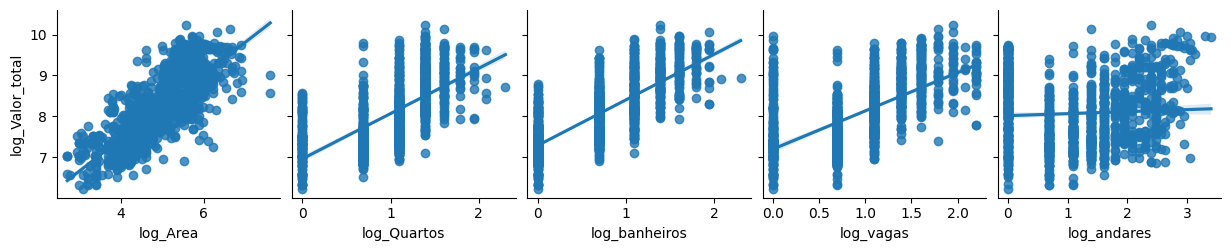

In [100]:
ax = sns.pairplot(data = dados_bh , y_vars ='log_Valor_total', x_vars = ['log_Area','log_Quartos','log_banheiros', 'log_vagas', 'log_andares'], kind = 'reg')

In [101]:
dados_bh[['log_Valor_total','log_Area','log_Quartos','log_banheiros', 'log_vagas', 'log_andares']].corr()

,log_Valor_total,log_Area,log_Quartos,log_banheiros,log_vagas,log_andares
log_Valor_total,1.00,0.79,0.64,0.79,0.63,0.05
log_Area,0.79,1.00,0.80,0.80,0.64,-0.20
log_Quartos,0.64,0.80,1.00,0.72,0.58,-0.14
log_banheiros,0.79,0.80,0.72,1.00,0.62,-0.03
log_vagas,0.63,0.64,0.58,0.62,1.00,-0.04
log_andares,0.05,-0.20,-0.14,-0.03,-0.04,1.00


In [102]:
y = dados_bh['log_Valor_total']
X = dados_bh[['log_Area','log_Quartos','log_banheiros', 'log_vagas', 'log_andares']]

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [104]:
model = LinearRegression()

In [105]:
model.fit(X_train,y_train)

LinearRegression()

In [106]:
print('R² = {}'.format(model.score(X_train,y_train).round(3)))

R² = 0.733


In [107]:
y_predicted = model.predict(X_test)

In [108]:
print('R² = %s'% metrics.r2_score(y_test, y_predicted).round(3))

R² = 0.732


In [109]:
inputs = X_test[0:1]
inputs

,log_Area,log_Quartos,log_banheiros,log_vagas,log_andares
126,4.25,0.69,0.00,0.69,1.39


In [110]:
np.exp(model.predict(inputs)[0])

1772.6801682685782

In [111]:
dados_bh.iloc[[125]]

,cidade,area,quartos,banheiros,vagas,andares,animal,mobilia,Valor_condominio,Valor_aluguel,Valor_impostos,Valor_seguro,Valor_total,Preço_do_m2,log_Valor_total,log_Area,log_Quartos,log_banheiros,log_vagas,log_andares
126,Belo Horizonte,70,2,1,1,3,0,0,344,1100,107,15,1566,22,7.36,4.25,0.69,0.00,0.69,1.39


In [112]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
area = widgets.Text(description="Área")
quartos = widgets.Text(description="Quartos")
banheiros = widgets.Text(description="Banheiros")
vagas = widgets.Text(description="Vagas")
andares = widgets.Text(description="Andares")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([area,quartos,banheiros])
right = VBox([vagas,andares])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    # Obtendo os valores digitados nos campos de entrada e convertendo-os para números
    area_value = float(area.value) if area.value else 0
    quartos_value = float(quartos.value) if quartos.value else 0
    banheiros_value = float(banheiros.value) if banheiros.value else 0
    vagas_value = float(vagas.value) if vagas.value else 0
    andares_value = float(andares.value) if andares.value else 0
 
    # Calculando a entrada para a simulação com os valores convertidos
    entrada = [[np.log(area_value),np.log(quartos_value), np.log(banheiros_value),np.log(vagas_value + 1),np.log(andares_value + 1)]]

    # Realizando a previsão usando o modelo (defina a variável "model" antes desta etapa)
    print('$ {0:.2f}'.format(np.exp(model.predict(entrada)[0])))

    
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)

In [113]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())